Warm-Up 3/25/24

In [4]:
x = 5
list_of_numbers = [x for x in range(x+1)]
list_of_numbers

[0, 1, 2, 3, 4, 5]

In [6]:
def number(a:int):
    count = 1;
    while (count<=a):
        if(count%3==0 and count%5==0):
            print(count,'fizzbuzz');
        elif(count%3==0):
            print(count,'fizz');
        elif(count%5==0):
            print(count,'buzz');
        else:
            print(count)
        count+=1;
number(6)

1
2
3 fizz
4
5 buzz
6 fizz


In [8]:
import pandas as pd
from sklearn import tree
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

diabetes_df = pd.read_csv("diabetes.csv")
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [133]:
from sklearn.model_selection import train_test_split

X = diabetes_df.drop('Outcome', axis=1)
y = diabetes_df['Outcome']

# split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.3, random_state=32)

In [13]:
# decision tree classifer
# deep and complex trees tend to overfit
# reasonably simple trees as much as possible
model = tree.DecisionTreeClassifier(max_depth = 7, random_state=32)

In [14]:
model = model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [16]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.76      0.77       147
           1       0.60      0.62      0.61        84

    accuracy                           0.71       231
   macro avg       0.69      0.69      0.69       231
weighted avg       0.71      0.71      0.71       231



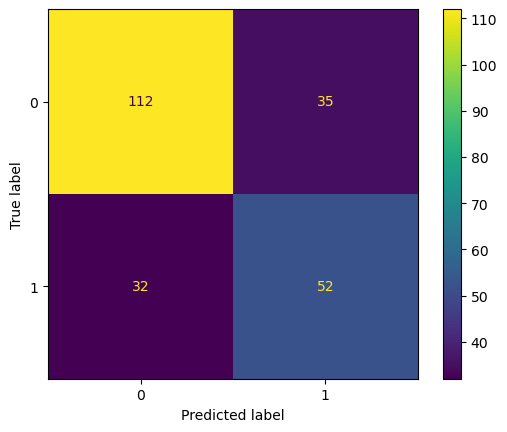

In [17]:
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)

In [18]:
# recall
52/(52+32)

0.6190476190476191

In [5]:
52/(52+35)

0.5977011494252874

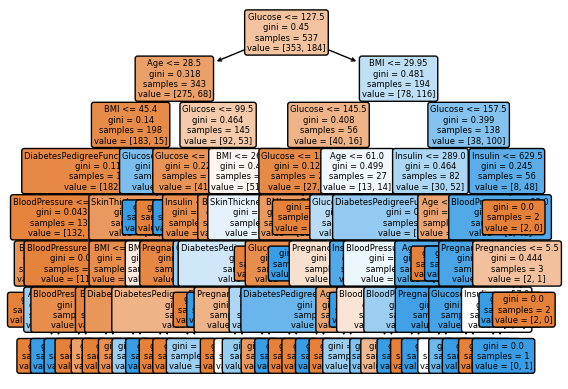

<Figure size 640x480 with 0 Axes>

In [21]:
import matplotlib.pyplot as plt
tree.plot_tree(model, feature_names = list(X.columns), 
              filled=True, fontsize=6, rounded=True)
plt.show()
plt.savefig("tree.svg")